In [5]:
# 🛠️ Setup - Run this first!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, FloatSlider, IntSlider, Button, HBox, VBox, Output
import time

# Enable inline animations
%matplotlib widget

# Game state
game_score = {'total': 0, 'level': 1}

def add_score(points):
    game_score['total'] += points
    print(f"⭐ +{points} points! Total: {game_score['total']}")

print("✅ Game Lab Ready! Let's play with linear algebra!")

✅ Game Lab Ready! Let's play with linear algebra!


---
## 🎯 Level 1: Vector Playground

**Goal:** Use the sliders to control a vector. Can you reach the target?

A vector is just an arrow with a **direction** and **magnitude**. Move the sliders to see how changing x and y affects the vector!

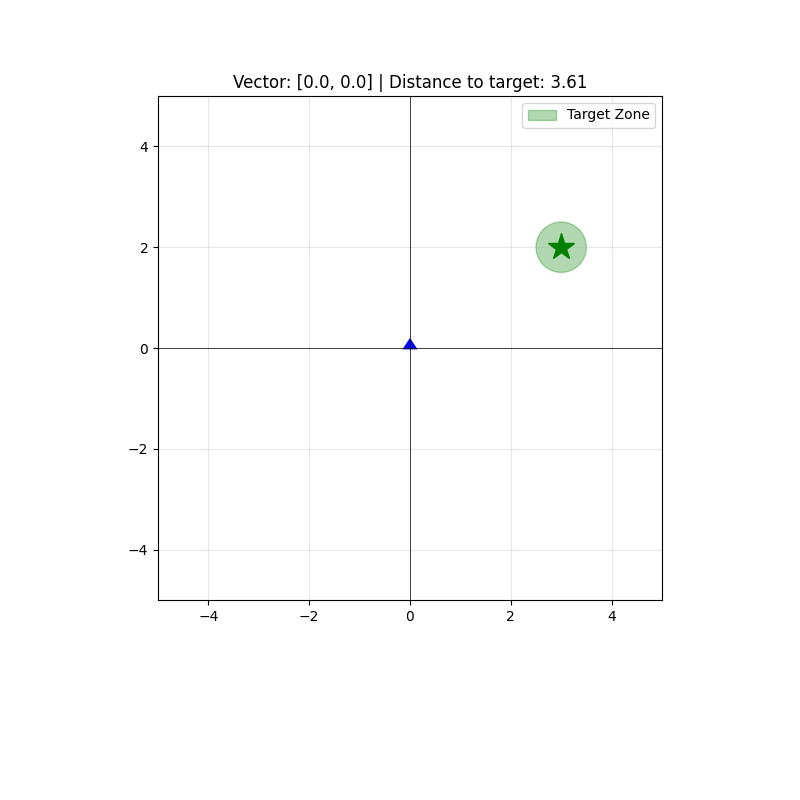

In [ ]:
# 🎮 GAME 1: Hit the Target!
# Move your vector to reach the target zone

target = np.array([3, 2])  # Secret target
tolerance = 0.5

plt.ioff()  # Prevent auto-display
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.ion()

def update_vector_game(x, y):
    ax1.clear()
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.axvline(0, color='black', linewidth=0.5)
    
    # Draw target zone
    target_circle = plt.Circle(target, tolerance, color='green', alpha=0.3, label='Target Zone')
    ax1.add_patch(target_circle)
    ax1.plot(*target, 'g*', markersize=20)
    
    # Draw player vector
    ax1.arrow(0, 0, x, y, head_width=0.2, head_length=0.15, fc='blue', ec='blue', linewidth=2)
    
    # Check if hit target
    distance = np.sqrt((x - target[0])**2 + (y - target[1])**2)
    
    if distance < tolerance:
        ax1.set_title('🎉 TARGET HIT! +10 points!', fontsize=16, color='green')
        ax1.set_facecolor('#e6ffe6')
    else:
        ax1.set_title(f'Vector: [{x:.1f}, {y:.1f}] | Distance to target: {distance:.2f}', fontsize=12)
    
    ax1.legend()
    fig1.canvas.draw_idle()

# Create sliders
x_slider = FloatSlider(min=-5, max=5, step=0.1, value=0, description='X:')
y_slider = FloatSlider(min=-5, max=5, step=0.1, value=0, description='Y:')

interactive(update_vector_game, x=x_slider, y=y_slider)
display(VBox([HBox([x_slider, y_slider]), fig1.canvas]))
update_vector_game(0, 0)

---
## 🚀 Level 2: Vector Addition Race

**Goal:** Add two vectors to reach the finish line!

Vector addition: $\vec{a} + \vec{b}$ means "walk along $\vec{a}$, then walk along $\vec{b}$".

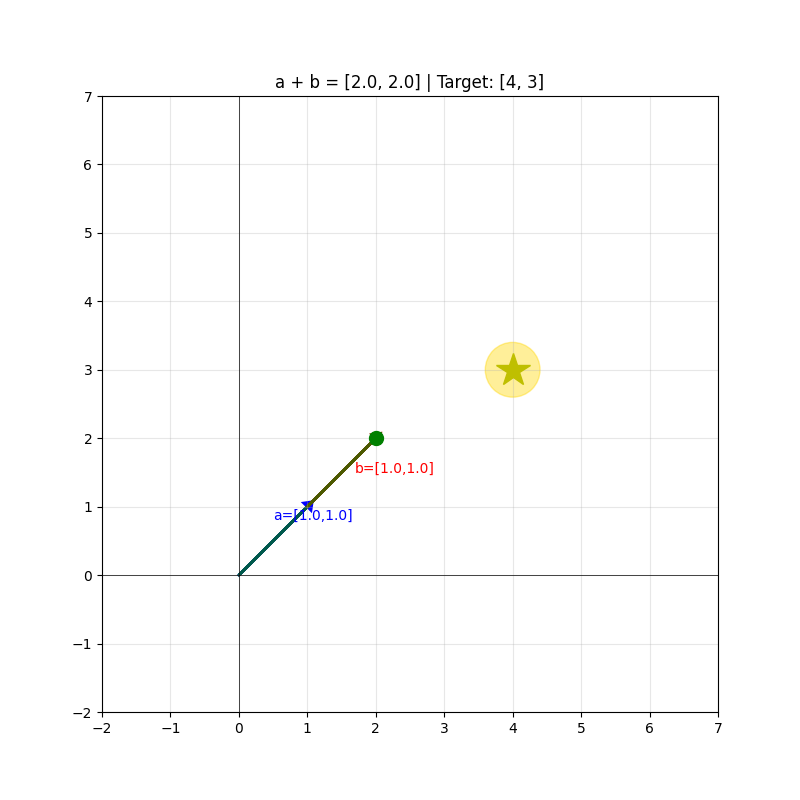

In [ ]:
# 🎮 GAME 2: Vector Addition Race
# Adjust both vectors so their SUM lands on the target!

target2 = np.array([4, 3])

plt.ioff()
fig2, ax2 = plt.subplots(figsize=(8, 8))
plt.ion()

def update_addition_game(ax, ay, bx, by):
    ax2.clear()
    ax2.set_xlim(-2, 7)
    ax2.set_ylim(-2, 7)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(0, color='black', linewidth=0.5)
    ax2.axvline(0, color='black', linewidth=0.5)
    
    a = np.array([ax, ay])
    b = np.array([bx, by])
    result = a + b
    
    # Draw target
    target_circle = plt.Circle(target2, 0.4, color='gold', alpha=0.4)
    ax2.add_patch(target_circle)
    ax2.plot(*target2, 'y*', markersize=25, label='🏁 Finish')
    
    # Draw vector a (blue)
    ax2.arrow(0, 0, ax, ay, head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
    ax2.text(ax/2, ay/2 + 0.3, f'a=[{ax:.1f},{ay:.1f}]', color='blue', fontsize=10)
    
    # Draw vector b (red) starting from tip of a
    ax2.arrow(ax, ay, bx, by, head_width=0.15, head_length=0.1, fc='red', ec='red', linewidth=2)
    ax2.text(ax + bx/2 + 0.2, ay + by/2, f'b=[{bx:.1f},{by:.1f}]', color='red', fontsize=10)
    
    # Draw result (green dashed)
    ax2.arrow(0, 0, result[0], result[1], head_width=0.15, head_length=0.1, 
              fc='green', ec='green', linewidth=2, linestyle='-', alpha=0.7)
    ax2.plot(*result, 'go', markersize=10)
    
    distance = np.linalg.norm(result - target2)
    
    if distance < 0.4:
        ax2.set_title('🏆 FINISH! a + b = target! +20 points!', fontsize=14, color='green')
        ax2.set_facecolor('#fff9e6')
    else:
        ax2.set_title(f'a + b = [{result[0]:.1f}, {result[1]:.1f}] | Target: [{target2[0]}, {target2[1]}]', fontsize=12)
    
    fig2.canvas.draw_idle()

# Sliders for both vectors
slider_ax = FloatSlider(min=-3, max=5, step=0.1, value=1, description='a.x:', style={'description_width': '40px'})
slider_ay = FloatSlider(min=-3, max=5, step=0.1, value=1, description='a.y:', style={'description_width': '40px'})
slider_bx = FloatSlider(min=-3, max=5, step=0.1, value=1, description='b.x:', style={'description_width': '40px'})
slider_by = FloatSlider(min=-3, max=5, step=0.1, value=1, description='b.y:', style={'description_width': '40px'})

ui = VBox([
    widgets.HTML('<b style="color:blue">Vector a:</b>'), HBox([slider_ax, slider_ay]),
    widgets.HTML('<b style="color:red">Vector b:</b>'), HBox([slider_bx, slider_by]),
    fig2.canvas
])

interactive(update_addition_game, ax=slider_ax, ay=slider_ay, bx=slider_bx, by=slider_by)
display(ui)
update_addition_game(1, 1, 1, 1)

---
## 🌀 Level 3: Transformation Animator

**Goal:** Watch space warp in real-time! Drag the matrix sliders to create different transformations.

A 2x2 matrix $\begin{bmatrix} a & b \\ c & d \end{bmatrix}$ transforms every point in space!

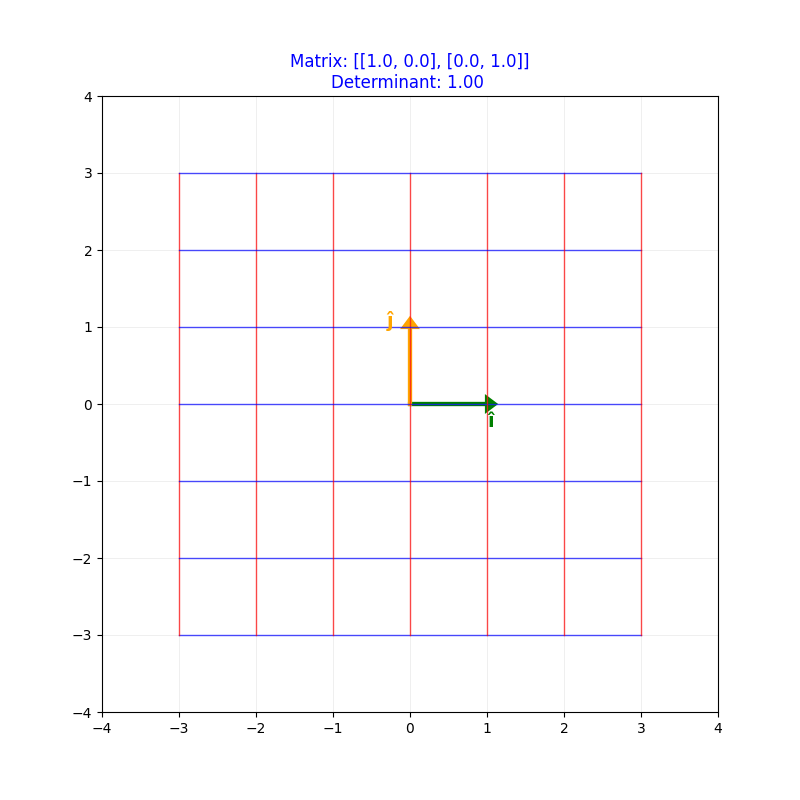

In [ ]:
# 🎮 GAME 3: The Grid Warper
# Watch the grid deform as you change the matrix!

plt.ioff()
fig3, ax3 = plt.subplots(figsize=(8, 8))
plt.ion()

def draw_transformed_grid(a, b, c, d):
    ax3.clear()
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(-4, 4)
    ax3.set_aspect('equal')
    
    M = np.array([[a, b], [c, d]])
    det = np.linalg.det(M)
    
    # Draw original grid (light gray)
    for i in range(-3, 4):
        ax3.axhline(i, color='lightgray', linewidth=0.5, alpha=0.5)
        ax3.axvline(i, color='lightgray', linewidth=0.5, alpha=0.5)
    
    # Draw transformed grid
    for i in np.linspace(-3, 3, 7):
        # Horizontal lines
        line_h = np.array([[x, i] for x in np.linspace(-3, 3, 50)])
        transformed_h = (M @ line_h.T).T
        ax3.plot(transformed_h[:, 0], transformed_h[:, 1], 'b-', linewidth=1, alpha=0.7)
        
        # Vertical lines
        line_v = np.array([[i, y] for y in np.linspace(-3, 3, 50)])
        transformed_v = (M @ line_v.T).T
        ax3.plot(transformed_v[:, 0], transformed_v[:, 1], 'r-', linewidth=1, alpha=0.7)
    
    # Draw basis vectors
    i_hat = M @ np.array([1, 0])
    j_hat = M @ np.array([0, 1])
    
    ax3.arrow(0, 0, i_hat[0], i_hat[1], head_width=0.15, head_length=0.1, fc='green', ec='green', linewidth=3)
    ax3.arrow(0, 0, j_hat[0], j_hat[1], head_width=0.15, head_length=0.1, fc='orange', ec='orange', linewidth=3)
    ax3.text(i_hat[0], i_hat[1] - 0.3, 'î', fontsize=14, color='green', fontweight='bold')
    ax3.text(j_hat[0] - 0.3, j_hat[1], 'ĵ', fontsize=14, color='orange', fontweight='bold')
    
    # Title with matrix and determinant
    det_color = 'red' if det < 0 else ('gray' if abs(det) < 0.1 else 'blue')
    det_msg = '(FLIPPED!)' if det < 0 else ('(SQUISHED!)' if abs(det) < 0.1 else '')
    ax3.set_title(f'Matrix: [[{a:.1f}, {b:.1f}], [{c:.1f}, {d:.1f}]]\nDeterminant: {det:.2f} {det_msg}', 
                  fontsize=12, color=det_color)
    
    fig3.canvas.draw_idle()

# Matrix sliders
style = {'description_width': '30px'}
slider_a = FloatSlider(min=-2, max=2, step=0.1, value=1, description='a:', style=style)
slider_b = FloatSlider(min=-2, max=2, step=0.1, value=0, description='b:', style=style)
slider_c = FloatSlider(min=-2, max=2, step=0.1, value=0, description='c:', style=style)
slider_d = FloatSlider(min=-2, max=2, step=0.1, value=1, description='d:', style=style)

matrix_ui = VBox([
    widgets.HTML('<h4>Matrix = [[a, b], [c, d]]</h4>'),
    HBox([slider_a, slider_b]),
    HBox([slider_c, slider_d]),
    widgets.HTML('<i>Try: Rotation (a=0,b=-1,c=1,d=0) | Shear (a=1,b=1,c=0,d=1) | Flip (a=-1)</i>'),
    fig3.canvas
])

interactive(draw_transformed_grid, a=slider_a, b=slider_b, c=slider_c, d=slider_d)
display(matrix_ui)
draw_transformed_grid(1, 0, 0, 1)

---
## 🎭 Level 4: Transformation Challenge

**Goal:** Match the target transformation! Adjust the matrix to transform the blue square into the red shape.

This tests your understanding of what each matrix element does.

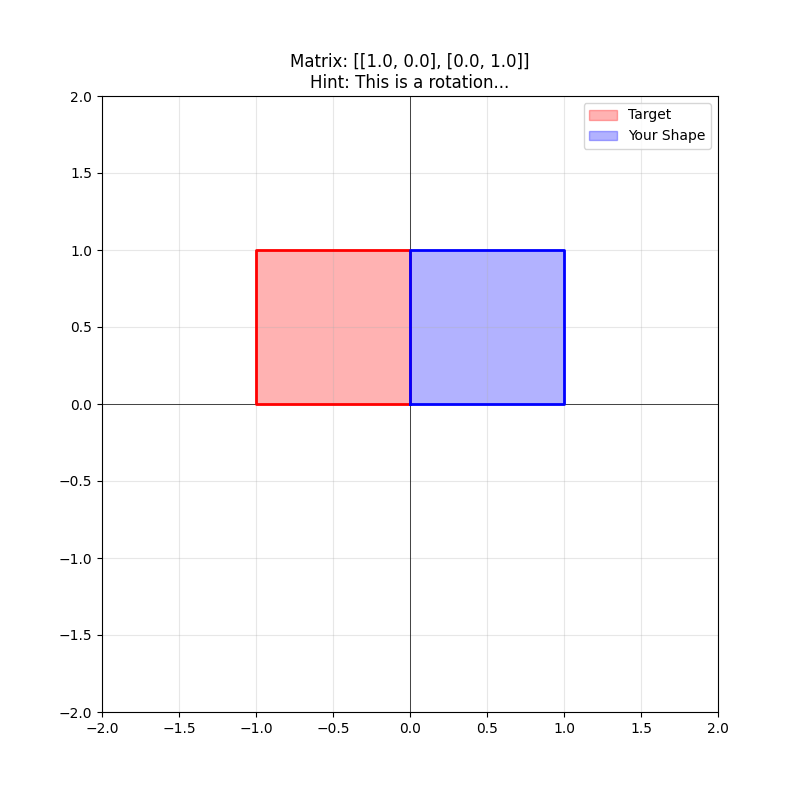

In [ ]:
# 🎮 GAME 4: Match the Transformation
# Adjust your matrix to match the target shape!

# Target transformation (hidden from player initially)
target_matrix = np.array([[0, -1], [1, 0]])  # 90° rotation

# Unit square vertices
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T
target_shape = target_matrix @ square

plt.ioff()
fig4, ax4 = plt.subplots(figsize=(8, 8))
plt.ion()

def check_transformation(a, b, c, d):
    ax4.clear()
    ax4.set_xlim(-2, 2)
    ax4.set_ylim(-2, 2)
    ax4.set_aspect('equal')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(0, color='black', linewidth=0.5)
    ax4.axvline(0, color='black', linewidth=0.5)
    
    M = np.array([[a, b], [c, d]])
    player_shape = M @ square
    
    # Draw target (red, semi-transparent)
    ax4.fill(target_shape[0], target_shape[1], alpha=0.3, color='red', label='Target')
    ax4.plot(target_shape[0], target_shape[1], 'r-', linewidth=2)
    
    # Draw player shape (blue)
    ax4.fill(player_shape[0], player_shape[1], alpha=0.3, color='blue', label='Your Shape')
    ax4.plot(player_shape[0], player_shape[1], 'b-', linewidth=2)
    
    # Check if matched
    error = np.linalg.norm(M - target_matrix)
    
    if error < 0.2:
        ax4.set_title('🎉 PERFECT MATCH! +30 points!', fontsize=16, color='green')
        ax4.set_facecolor('#e6ffe6')
    elif error < 0.5:
        ax4.set_title('🔥 Almost there! Keep adjusting...', fontsize=14, color='orange')
    else:
        ax4.set_title(f'Matrix: [[{a:.1f}, {b:.1f}], [{c:.1f}, {d:.1f}]]\nHint: This is a rotation...', fontsize=12)
    
    ax4.legend()
    fig4.canvas.draw_idle()

# Sliders
s_a = FloatSlider(min=-2, max=2, step=0.1, value=1, description='a:')
s_b = FloatSlider(min=-2, max=2, step=0.1, value=0, description='b:')
s_c = FloatSlider(min=-2, max=2, step=0.1, value=0, description='c:')
s_d = FloatSlider(min=-2, max=2, step=0.1, value=1, description='d:')

interactive(check_transformation, a=s_a, b=s_b, c=s_c, d=s_d)
display(VBox([HBox([s_a, s_b]), HBox([s_c, s_d]), fig4.canvas]))
check_transformation(1, 0, 0, 1)

---
## 🔢 Level 5: Determinant Visualizer

**Goal:** See how the determinant relates to area! The unit square's area changes as you transform it.

- **det = 1**: Area preserved
- **det > 1**: Area increased
- **det < 1**: Area decreased
- **det < 0**: Space is FLIPPED (orientation reversed)

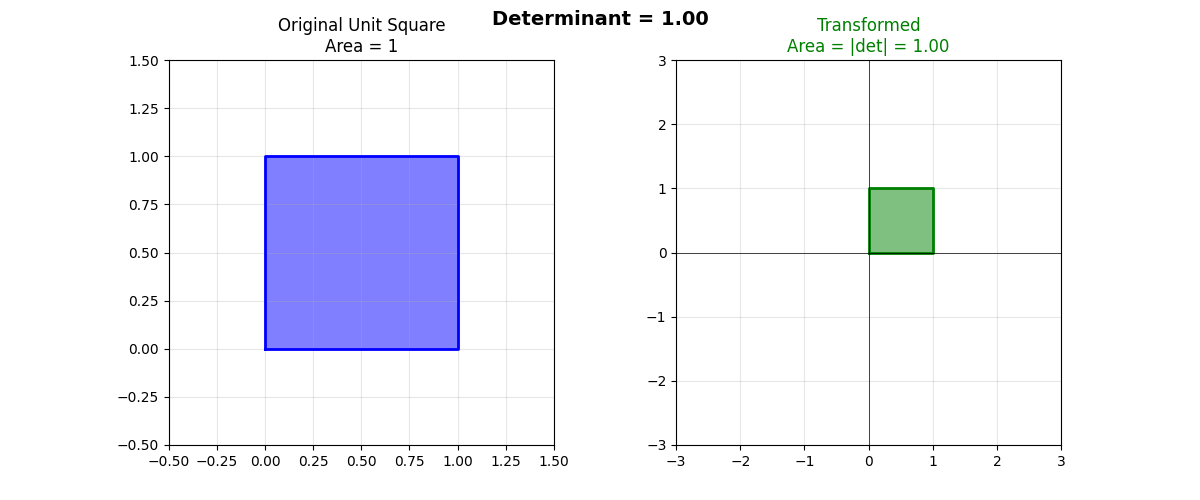

In [11]:
# 🎮 GAME 5: The Area Stretcher
# Watch the area change in real-time!

fig5, (ax5a, ax5b) = plt.subplots(1, 2, figsize=(12, 5))

def visualize_determinant(a, b, c, d):
    ax5a.clear()
    ax5b.clear()
    
    M = np.array([[a, b], [c, d]])
    det = np.linalg.det(M)
    
    # Left plot: Unit square
    ax5a.set_xlim(-0.5, 1.5)
    ax5a.set_ylim(-0.5, 1.5)
    ax5a.set_aspect('equal')
    ax5a.set_title('Original Unit Square\nArea = 1', fontsize=12)
    ax5a.fill([0, 1, 1, 0], [0, 0, 1, 1], alpha=0.5, color='blue')
    ax5a.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'b-', linewidth=2)
    ax5a.grid(True, alpha=0.3)
    
    # Right plot: Transformed
    transformed = M @ np.array([[0, 1, 1, 0], [0, 0, 1, 1]])
    ax5b.set_xlim(-3, 3)
    ax5b.set_ylim(-3, 3)
    ax5b.set_aspect('equal')
    
    # Color based on determinant sign
    color = 'red' if det < 0 else 'green'
    ax5b.fill(transformed[0], transformed[1], alpha=0.5, color=color)
    ax5b.plot(np.append(transformed[0], transformed[0, 0]), 
              np.append(transformed[1], transformed[1, 0]), '-', color=color, linewidth=2)
    
    # Draw origin and axes
    ax5b.axhline(0, color='black', linewidth=0.5)
    ax5b.axvline(0, color='black', linewidth=0.5)
    ax5b.grid(True, alpha=0.3)
    
    flip_msg = ' (FLIPPED! 🔄)' if det < 0 else ''
    ax5b.set_title(f'Transformed\nArea = |det| = {abs(det):.2f}{flip_msg}', fontsize=12, color=color)
    
    fig5.suptitle(f'Determinant = {det:.2f}', fontsize=14, fontweight='bold')
    fig5.canvas.draw_idle()

# Sliders
det_a = FloatSlider(min=-2, max=2, step=0.1, value=1, description='a:')
det_b = FloatSlider(min=-2, max=2, step=0.1, value=0, description='b:')
det_c = FloatSlider(min=-2, max=2, step=0.1, value=0, description='c:')
det_d = FloatSlider(min=-2, max=2, step=0.1, value=1, description='d:')

interactive(visualize_determinant, a=det_a, b=det_b, c=det_c, d=det_d)
display(VBox([HBox([det_a, det_b]), HBox([det_c, det_d])]))
visualize_determinant(1, 0, 0, 1)

---
## 🎯 Level 6: Eigenvector Explorer

**Goal:** Find the special directions that DON'T rotate during transformation!

Eigenvectors are vectors that only get **stretched** (not rotated) when transformed. The stretch factor is the **eigenvalue**.

IntSlider(value=0, description='Angle (°):', max=360, step=5)

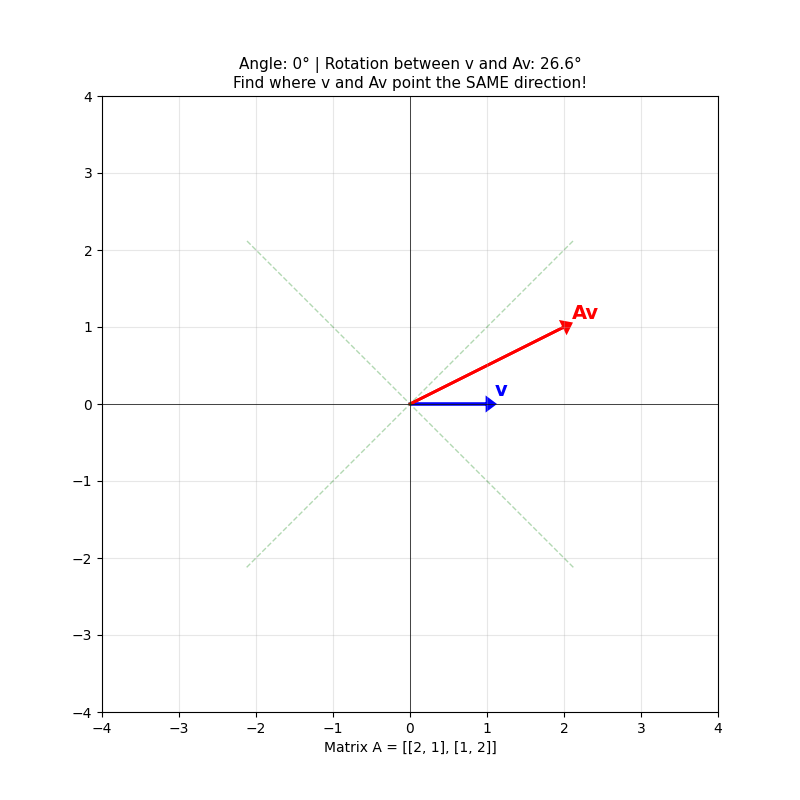

In [12]:
# 🎮 GAME 6: Find the Eigenvector!
# Rotate your vector until it aligns with an eigenvector direction

# A matrix with clear eigenvectors
A = np.array([[2, 1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eig(A)

fig6, ax6 = plt.subplots(figsize=(8, 8))

def explore_eigenvector(angle):
    ax6.clear()
    ax6.set_xlim(-4, 4)
    ax6.set_ylim(-4, 4)
    ax6.set_aspect('equal')
    ax6.grid(True, alpha=0.3)
    ax6.axhline(0, color='black', linewidth=0.5)
    ax6.axvline(0, color='black', linewidth=0.5)
    
    # Player's vector based on angle
    rad = np.radians(angle)
    v = np.array([np.cos(rad), np.sin(rad)])
    
    # Transform it
    Av = A @ v
    
    # Draw original vector (blue)
    ax6.arrow(0, 0, v[0], v[1], head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
    ax6.text(v[0] + 0.1, v[1] + 0.1, 'v', fontsize=14, color='blue', fontweight='bold')
    
    # Draw transformed vector (red)
    ax6.arrow(0, 0, Av[0], Av[1], head_width=0.15, head_length=0.1, fc='red', ec='red', linewidth=2)
    ax6.text(Av[0] + 0.1, Av[1] + 0.1, 'Av', fontsize=14, color='red', fontweight='bold')
    
    # Draw actual eigenvector directions (faint)
    for i in range(2):
        ev = eigenvectors[:, i]
        ax6.plot([-3*ev[0], 3*ev[0]], [-3*ev[1], 3*ev[1]], 'g--', alpha=0.3, linewidth=1)
    
    # Check if aligned with eigenvector (using cross product ≈ 0)
    aligned = False
    for i in range(2):
        ev = eigenvectors[:, i]
        cross = abs(v[0]*ev[1] - v[1]*ev[0])  # Cross product magnitude
        if cross < 0.1:  # Nearly parallel
            aligned = True
            ax6.set_title(f'🎉 EIGENVECTOR FOUND! λ = {eigenvalues[i]:.2f}\nv and Av are parallel! +25 points!', 
                         fontsize=12, color='green')
            ax6.set_facecolor('#e6ffe6')
            break
    
    if not aligned:
        # Calculate angle between v and Av
        cos_angle = np.dot(v, Av) / (np.linalg.norm(v) * np.linalg.norm(Av))
        angle_diff = np.degrees(np.arccos(np.clip(cos_angle, -1, 1)))
        ax6.set_title(f'Angle: {angle}° | Rotation between v and Av: {angle_diff:.1f}°\nFind where v and Av point the SAME direction!', 
                     fontsize=11)
    
    ax6.set_xlabel(f'Matrix A = [[2, 1], [1, 2]]')
    fig6.canvas.draw_idle()

angle_slider = IntSlider(min=0, max=360, step=5, value=0, description='Angle (°):')
interactive(explore_eigenvector, angle=angle_slider)
display(angle_slider)
explore_eigenvector(0)

---
## 🎬 Level 7: Animated Transformation

**Goal:** Watch a transformation happen smoothly over time!

Click the button to animate from Identity → Your chosen transformation.

In [18]:
# 🎮 GAME 7: Watch the Animation!
# See the grid smoothly transform

# Create figure without auto-display
plt.ioff()
fig7, ax7 = plt.subplots(figsize=(8, 8))
plt.ion()

# Target matrix selection
transformations = {
    'Rotation 90°': np.array([[0, -1], [1, 0]]),
    'Shear': np.array([[1, 1], [0, 1]]),
    'Scale 2x': np.array([[2, 0], [0, 2]]),
    'Flip X': np.array([[-1, 0], [0, 1]]),
    'Squeeze': np.array([[2, 0], [0, 0.5]]),
}

transform_dropdown = widgets.Dropdown(
    options=list(transformations.keys()),
    value='Rotation 90°',
    description='Transform:'
)

play_button = Button(description='▶ Play Animation', button_style='success')

def animate_transformation(btn):
    target = transformations[transform_dropdown.value]
    identity = np.eye(2)
    
    frames = 30
    for frame in range(frames + 1):
        t = frame / frames  # 0 to 1
        M = identity * (1 - t) + target * t  # Linear interpolation
        
        ax7.clear()
        ax7.set_xlim(-3, 3)
        ax7.set_ylim(-3, 3)
        ax7.set_aspect('equal')
        
        # Draw transformed grid
        for i in np.linspace(-2, 2, 5):
            line_h = np.array([[x, i] for x in np.linspace(-2, 2, 30)])
            transformed_h = (M @ line_h.T).T
            ax7.plot(transformed_h[:, 0], transformed_h[:, 1], 'b-', linewidth=1, alpha=0.7)
            
            line_v = np.array([[i, y] for y in np.linspace(-2, 2, 30)])
            transformed_v = (M @ line_v.T).T
            ax7.plot(transformed_v[:, 0], transformed_v[:, 1], 'r-', linewidth=1, alpha=0.7)
        
        # Draw basis vectors
        i_hat = M @ np.array([1, 0])
        j_hat = M @ np.array([0, 1])
        ax7.arrow(0, 0, i_hat[0], i_hat[1], head_width=0.1, head_length=0.08, fc='green', ec='green', linewidth=3)
        ax7.arrow(0, 0, j_hat[0], j_hat[1], head_width=0.1, head_length=0.08, fc='orange', ec='orange', linewidth=3)
        
        progress = '█' * int(t * 20) + '░' * (20 - int(t * 20))
        ax7.set_title(f'{transform_dropdown.value}\n[{progress}] {int(t*100)}%', fontsize=12)
        
        fig7.canvas.draw()
        fig7.canvas.flush_events()
        time.sleep(0.03)

play_button.on_click(animate_transformation)

# Display controls and figure together
display(VBox([HBox([transform_dropdown, play_button]), fig7.canvas]))

---
## 📐 Level 8: Dot Product Angle Finder

**Goal:** Use the dot product to find the angle between two vectors!

Formula: $\cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}| |\vec{b}|}$

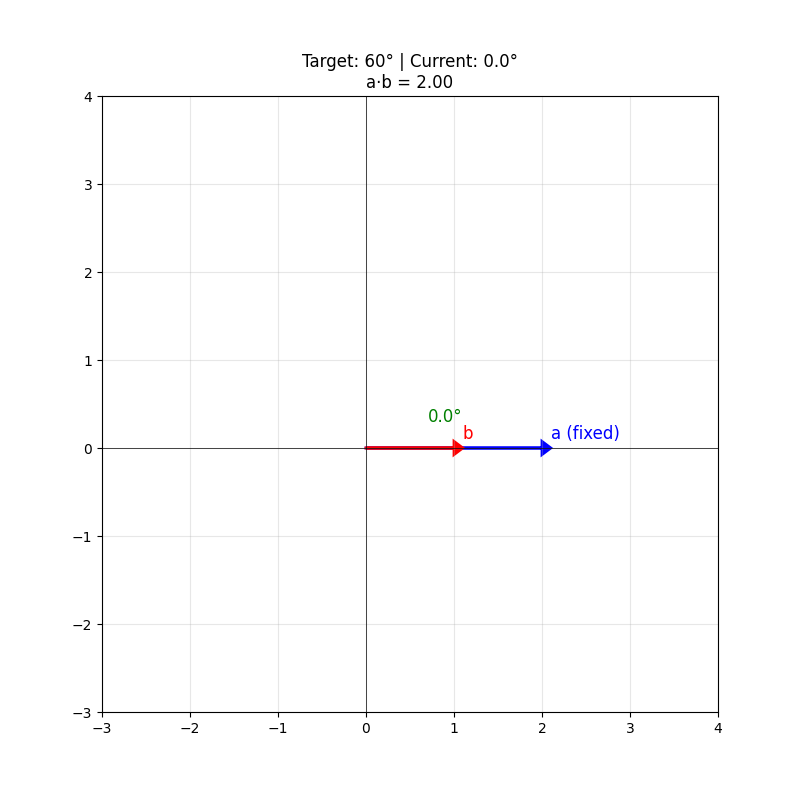

In [17]:
# 🎮 GAME 8: Angle Detective
# Adjust vector b to achieve the target angle!

fig8, ax8 = plt.subplots(figsize=(8, 8))
target_angle = 60  # Target angle in degrees

# Fixed vector a
a_fixed = np.array([2, 0])

def dot_product_game(bx, by):
    ax8.clear()
    ax8.set_xlim(-3, 4)
    ax8.set_ylim(-3, 4)
    ax8.set_aspect('equal')
    ax8.grid(True, alpha=0.3)
    ax8.axhline(0, color='black', linewidth=0.5)
    ax8.axvline(0, color='black', linewidth=0.5)
    
    b = np.array([bx, by])
    
    # Calculate dot product and angle
    dot = np.dot(a_fixed, b)
    mag_a = np.linalg.norm(a_fixed)
    mag_b = np.linalg.norm(b)
    
    if mag_b > 0.01:
        cos_theta = dot / (mag_a * mag_b)
        cos_theta = np.clip(cos_theta, -1, 1)
        angle = np.degrees(np.arccos(cos_theta))
    else:
        angle = 0
    
    # Draw vectors
    ax8.arrow(0, 0, a_fixed[0], a_fixed[1], head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
    ax8.text(a_fixed[0] + 0.1, a_fixed[1] + 0.1, 'a (fixed)', fontsize=12, color='blue')
    
    ax8.arrow(0, 0, bx, by, head_width=0.15, head_length=0.1, fc='red', ec='red', linewidth=2)
    ax8.text(bx + 0.1, by + 0.1, 'b', fontsize=12, color='red')
    
    # Draw angle arc
    if mag_b > 0.1:
        arc_angles = np.linspace(0, np.radians(min(angle, 180)), 30)
        arc_x = 0.5 * np.cos(arc_angles)
        arc_y = 0.5 * np.sin(arc_angles)
        ax8.plot(arc_x, arc_y, 'g-', linewidth=2)
        ax8.text(0.7, 0.3, f'{angle:.1f}°', fontsize=12, color='green')
    
    # Check if target achieved
    if abs(angle - target_angle) < 3:
        ax8.set_title(f'🎉 TARGET ANGLE {target_angle}° ACHIEVED! +15 points!\na·b = {dot:.2f}', 
                     fontsize=12, color='green')
        ax8.set_facecolor('#e6ffe6')
    else:
        ax8.set_title(f'Target: {target_angle}° | Current: {angle:.1f}°\na·b = {dot:.2f}', fontsize=12)
    
    fig8.canvas.draw_idle()

bx_slider = FloatSlider(min=-3, max=3, step=0.1, value=1, description='b.x:')
by_slider = FloatSlider(min=-3, max=3, step=0.1, value=0, description='b.y:')

interactive(dot_product_game, bx=bx_slider, by=by_slider)
display(VBox([HBox([bx_slider, by_slider])]))
dot_product_game(1, 0)

---
## ✖️ Level 9: Cross Product 3D

**Goal:** See the cross product in 3D! The result is perpendicular to both input vectors.

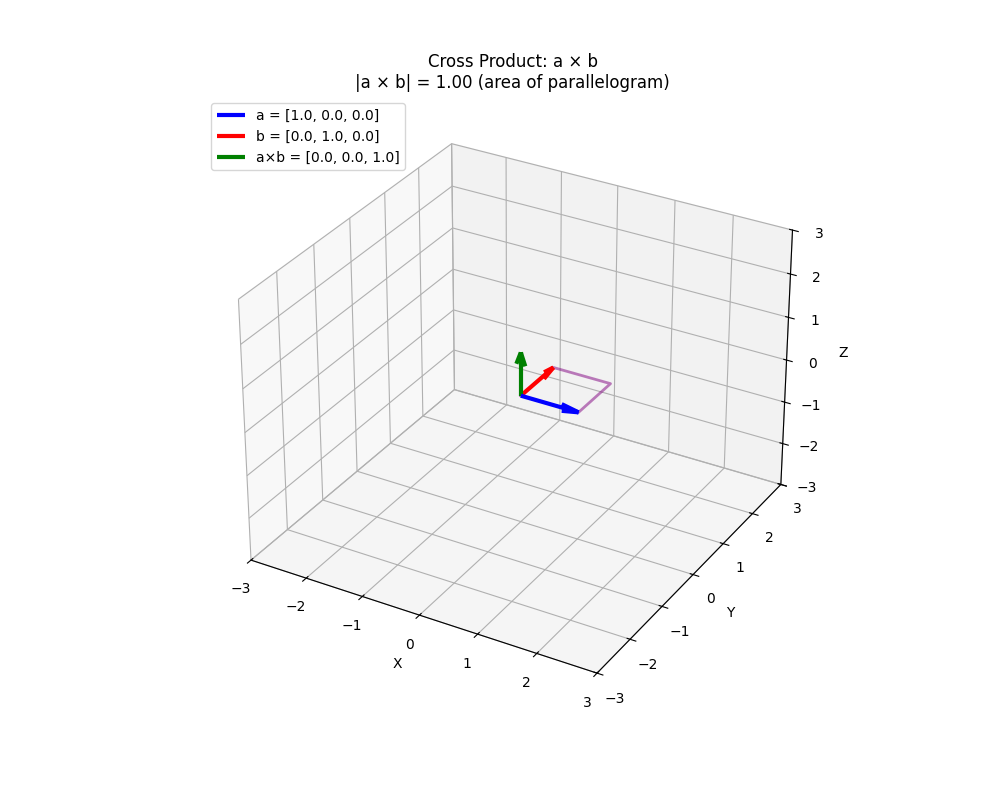

In [16]:
# 🎮 GAME 9: 3D Cross Product Visualizer
from mpl_toolkits.mplot3d import Axes3D

fig9 = plt.figure(figsize=(10, 8))
ax9 = fig9.add_subplot(111, projection='3d')

def visualize_cross(ax_val, ay_val, az_val, bx_val, by_val, bz_val):
    ax9.clear()
    
    a = np.array([ax_val, ay_val, az_val])
    b = np.array([bx_val, by_val, bz_val])
    cross = np.cross(a, b)
    
    # Draw vectors
    ax9.quiver(0, 0, 0, a[0], a[1], a[2], color='blue', linewidth=3, label=f'a = [{ax_val:.1f}, {ay_val:.1f}, {az_val:.1f}]')
    ax9.quiver(0, 0, 0, b[0], b[1], b[2], color='red', linewidth=3, label=f'b = [{bx_val:.1f}, {by_val:.1f}, {bz_val:.1f}]')
    ax9.quiver(0, 0, 0, cross[0], cross[1], cross[2], color='green', linewidth=3, label=f'a×b = [{cross[0]:.1f}, {cross[1]:.1f}, {cross[2]:.1f}]')
    
    # Draw the parallelogram
    verts = [[0, 0, 0], a, a+b, b]
    ax9.plot([0, a[0], a[0]+b[0], b[0], 0], 
             [0, a[1], a[1]+b[1], b[1], 0], 
             [0, a[2], a[2]+b[2], b[2], 0], 'purple', alpha=0.5, linewidth=2)
    
    # Set limits
    max_val = max(3, np.max(np.abs([a, b, cross])) + 1)
    ax9.set_xlim([-max_val, max_val])
    ax9.set_ylim([-max_val, max_val])
    ax9.set_zlim([-max_val, max_val])
    
    ax9.set_xlabel('X')
    ax9.set_ylabel('Y')
    ax9.set_zlabel('Z')
    
    area = np.linalg.norm(cross)
    ax9.set_title(f'Cross Product: a × b\n|a × b| = {area:.2f} (area of parallelogram)', fontsize=12)
    ax9.legend(loc='upper left')
    
    fig9.canvas.draw_idle()

# Sliders for 3D vectors
style = {'description_width': '40px'}
ax_s = FloatSlider(min=-2, max=2, step=0.1, value=1, description='a.x:', style=style)
ay_s = FloatSlider(min=-2, max=2, step=0.1, value=0, description='a.y:', style=style)
az_s = FloatSlider(min=-2, max=2, step=0.1, value=0, description='a.z:', style=style)
bx_s = FloatSlider(min=-2, max=2, step=0.1, value=0, description='b.x:', style=style)
by_s = FloatSlider(min=-2, max=2, step=0.1, value=1, description='b.y:', style=style)
bz_s = FloatSlider(min=-2, max=2, step=0.1, value=0, description='b.z:', style=style)

ui_3d = VBox([
    widgets.HTML('<b style="color:blue">Vector a:</b>'), HBox([ax_s, ay_s, az_s]),
    widgets.HTML('<b style="color:red">Vector b:</b>'), HBox([bx_s, by_s, bz_s])
])

interactive(visualize_cross, ax_val=ax_s, ay_val=ay_s, az_val=az_s, bx_val=bx_s, by_val=by_s, bz_val=bz_s)
display(ui_3d)
visualize_cross(1, 0, 0, 0, 1, 0)

---
## 🏆 Final Challenge: Build Your Own Transformation

**Goal:** Create a transformation that does ALL of these:
1. Doubles the area (det = 2)
2. Doesn't flip space (det > 0)
3. Moves the point [1, 0] to approximately [2, 1]

This is a hard puzzle! Use everything you've learned.

C:\Appl\knowvember-linear-algebra\.venv\Lib\site-packages\ipympl\backend_nbagg.py:342: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  self.figure.savefig(buf, format='png', dpi='figure')
C:\Appl\knowvember-linear-algebra\.venv\Lib\site-packages\ipympl\backend_nbagg.py:342: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  self.figure.savefig(buf, format='png', dpi='figure')


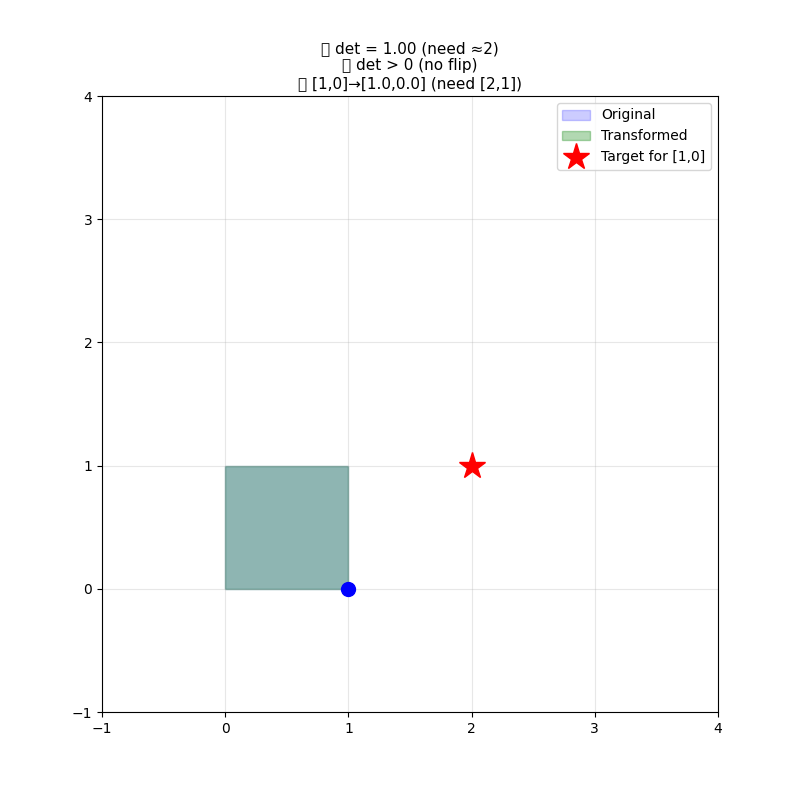

In [15]:
# 🏆 FINAL BOSS: Multi-Constraint Challenge

fig_final, ax_final = plt.subplots(figsize=(8, 8))

def final_challenge(a, b, c, d):
    ax_final.clear()
    ax_final.set_xlim(-1, 4)
    ax_final.set_ylim(-1, 4)
    ax_final.set_aspect('equal')
    ax_final.grid(True, alpha=0.3)
    
    M = np.array([[a, b], [c, d]])
    det = np.linalg.det(M)
    
    # Where does [1,0] go?
    result = M @ np.array([1, 0])
    target_point = np.array([2, 1])
    
    # Draw unit square transformation
    square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
    transformed = M @ square
    ax_final.fill(square[0], square[1], alpha=0.2, color='blue', label='Original')
    ax_final.fill(transformed[0], transformed[1], alpha=0.3, color='green', label='Transformed')
    
    # Draw target point
    ax_final.plot(*target_point, 'r*', markersize=20, label='Target for [1,0]')
    ax_final.plot(*result, 'bo', markersize=10)
    
    # Check conditions
    cond1 = abs(det - 2) < 0.2  # det ≈ 2
    cond2 = det > 0  # not flipped
    cond3 = np.linalg.norm(result - target_point) < 0.3  # [1,0] → [2,1]
    
    status = []
    status.append(f"{'✅' if cond1 else '❌'} det = {det:.2f} (need ≈2)")
    status.append(f"{'✅' if cond2 else '❌'} det > 0 (no flip)")
    status.append(f"{'✅' if cond3 else '❌'} [1,0]→[{result[0]:.1f},{result[1]:.1f}] (need [2,1])")
    
    if cond1 and cond2 and cond3:
        ax_final.set_title('🏆 ALL CONDITIONS MET! YOU WIN! +100 points!', fontsize=14, color='green')
        ax_final.set_facecolor('#e6ffe6')
    else:
        ax_final.set_title('\n'.join(status), fontsize=11)
    
    ax_final.legend()
    fig_final.canvas.draw_idle()

# Sliders
fa = FloatSlider(min=-3, max=3, step=0.1, value=1, description='a:')
fb = FloatSlider(min=-3, max=3, step=0.1, value=0, description='b:')
fc = FloatSlider(min=-3, max=3, step=0.1, value=0, description='c:')
fd = FloatSlider(min=-3, max=3, step=0.1, value=1, description='d:')

interactive(final_challenge, a=fa, b=fb, c=fc, d=fd)
display(VBox([HBox([fa, fb]), HBox([fc, fd])]))
final_challenge(1, 0, 0, 1)

---
## 🎊 Congratulations!

You've completed the Linear Algebra Game Lab! You learned:

- ✅ **Vectors** are arrows with direction and magnitude
- ✅ **Vector Addition** is "tip-to-tail" movement  
- ✅ **Matrices** transform space by moving basis vectors
- ✅ **Determinants** measure area scaling (negative = flip)
- ✅ **Eigenvectors** don't rotate, only stretch
- ✅ **Dot Product** measures alignment/similarity
- ✅ **Cross Product** gives perpendicular vectors (3D)

Keep playing with the sliders to build deeper intuition! 🚀